In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("titanic/train.csv")

In [3]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
y = dataset["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [5]:
# we ignore fare field because if fare increases Pclass also increases, there is a multicolinearity, so to remove it we remove fare field
# we ignored Parch because it does not effect the survival as we can see in the below graph.
x = dataset[["Pclass","Sex","Age","SibSp","Cabin","Embarked"]]
x

,Pclass,Sex,Age,SibSp,Cabin,Embarked
0,3,male,22.0,1,NaN,S
1,1,female,38.0,1,C85,C
2,3,female,26.0,0,NaN,S
3,1,female,35.0,1,C123,S
4,3,male,35.0,0,NaN,S
...,...,...,...,...,...,...
886,2,male,27.0,0,NaN,S
887,1,female,19.0,0,B42,S
888,3,female,NaN,1,NaN,S
889,1,male,26.0,0,C148,C


In [6]:
gender = dataset["Sex"]
gender

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [7]:
import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='count'>

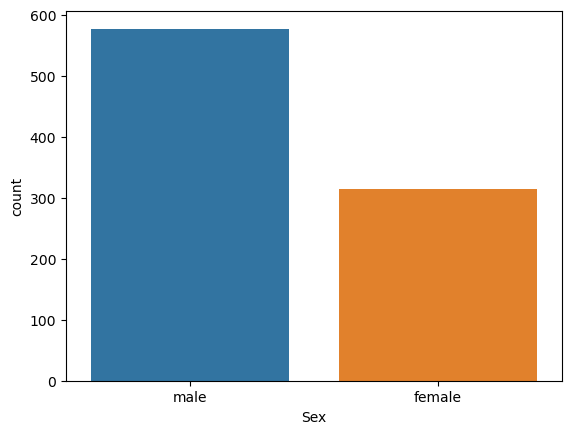

In [8]:
sns.countplot(data=dataset,x="Sex")

<AxesSubplot:xlabel='Sex', ylabel='count'>

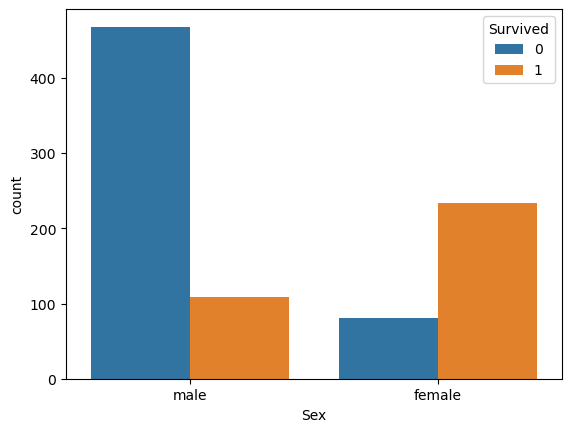

In [9]:
# hue is used to divide the data between two columns
# as we can see in the below graph survival is more for females when compared to male so Sex is impacting survival
sns.countplot(data=dataset,x="Sex",hue="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

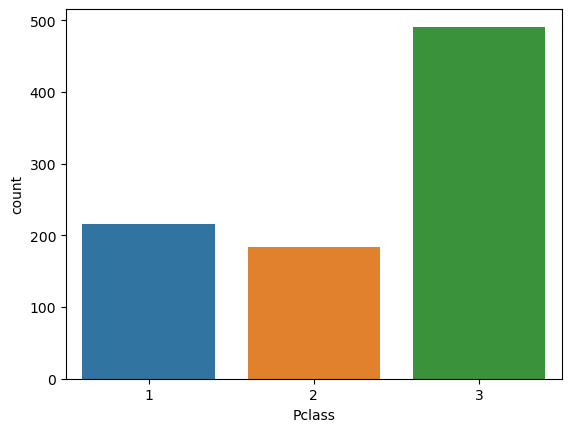

In [10]:
sns.countplot(data=dataset,x="Pclass")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

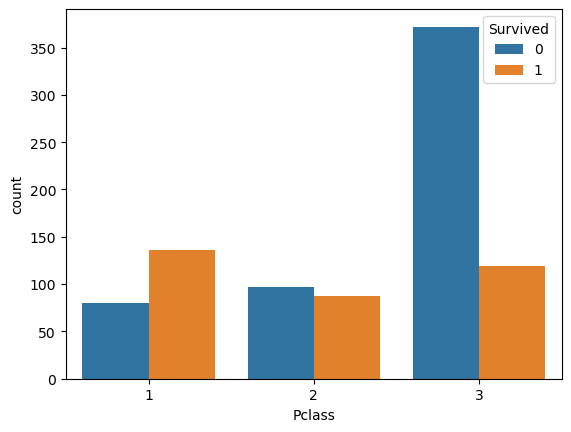

In [11]:
# in the below graph 1 class has more survival rate and 3rd class has least survival, so pclass is also impacting survival
sns.countplot(data=dataset,x="Pclass",hue="Survived")

<AxesSubplot:xlabel='SibSp', ylabel='count'>

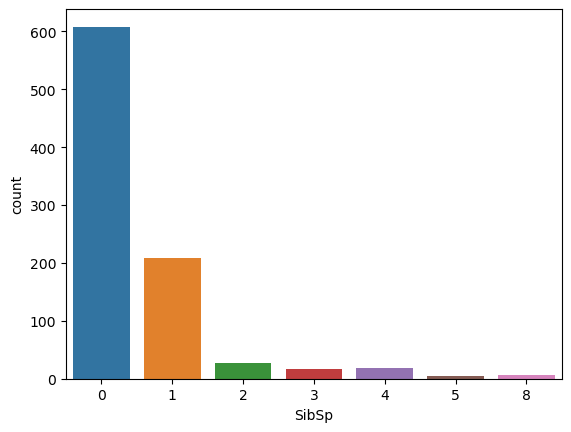

In [12]:
sns.countplot(data=dataset,x="SibSp")

<AxesSubplot:xlabel='SibSp', ylabel='count'>

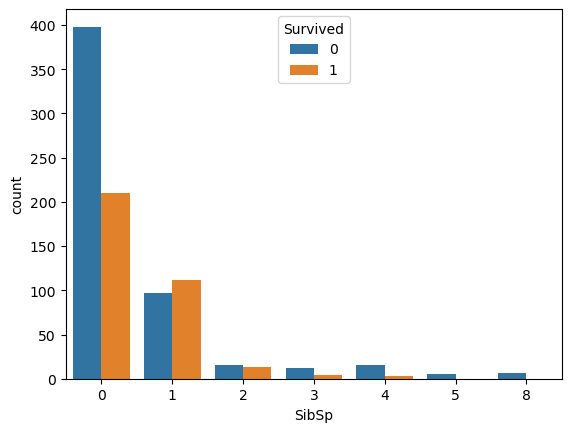

In [13]:
sns.countplot(data=dataset,x="SibSp",hue="Survived")

<AxesSubplot:xlabel='Parch', ylabel='count'>

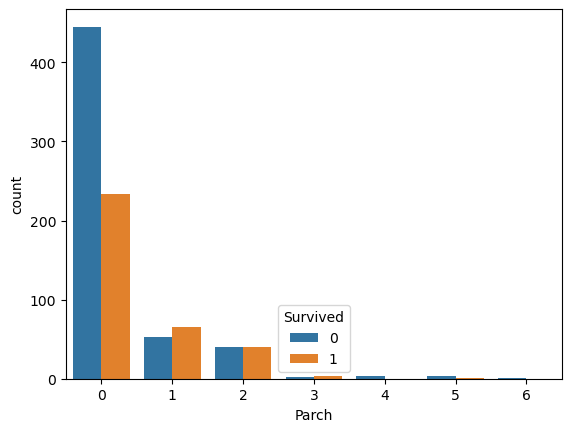

In [14]:
# we can ignore this field as 0 and 5 and 6 has least survival rate
sns.countplot(data=dataset,x="Parch",hue="Survived")

In [15]:
# axis = 0 is rows and axis = 1 is columns, if we want to drop a row axis = 0 ,if we want to drop a column axis = 1
# dropping the fields which are not required , analysed from the below graphs.
dataset.drop(["PassengerId","Parch","Ticket","Fare","Name"],axis=1,inplace=True)

In [16]:
age = dataset["Age"]
age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

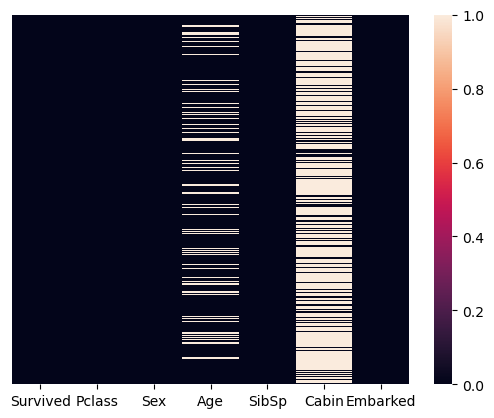

In [17]:
# to check the null values in data, the places where there is a white lines those are null values in that category.
sns.heatmap(dataset.isnull(),yticklabels=False,)

In [18]:
# handling nan values in age section, by filling nan values with the average of the ages in that Pclass.
import numpy as np
def set_age(row):
    
    Pclass = row[0]
    age = row[1]
    
    if np.isnan(age):
        
        if(Pclass==1):
            return 38
        elif(Pclass==2):
            return 29
        else:
            return 25
        
    else:
        return age

In [19]:
dataset["Age"]=dataset[["Pclass","Age"]].apply(set_age,axis=1)

In [20]:
dataset[dataset["Age"].isna()]

,Survived,Pclass,Sex,Age,SibSp,Cabin,Embarked


<AxesSubplot:>

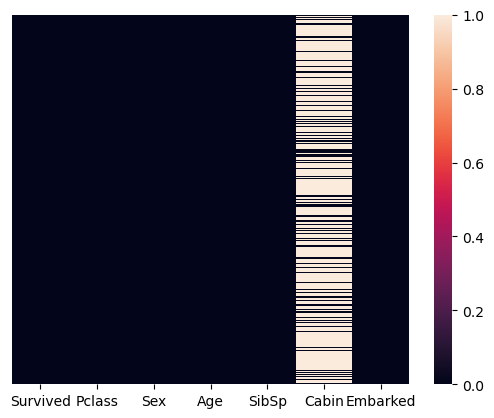

In [21]:
sns.heatmap(dataset.isnull(),yticklabels=False)

In [22]:
# as we can see in the above heatmap there are many null values in cabin category, we there is no point to fill 
# nan values, good idea would be droping the cabin column

dataset.drop("Cabin",inplace=True,axis=1)

In [23]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S
...,...,...,...,...,...,...
886,0,2,male,27.0,0,S
887,1,1,female,19.0,0,S
888,0,3,female,25.0,1,S
889,1,1,male,26.0,0,C


<AxesSubplot:>

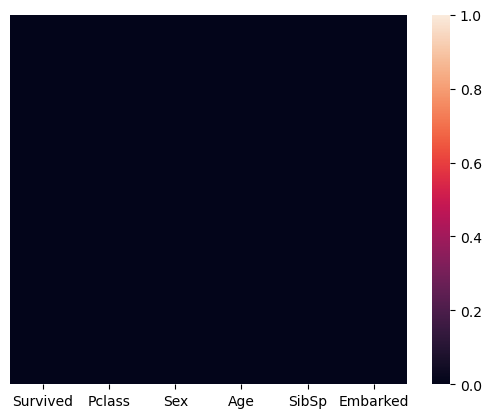

In [24]:
sns.heatmap(dataset.isnull(),yticklabels=False)

In [25]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S
...,...,...,...,...,...,...
886,0,2,male,27.0,0,S
887,1,1,female,19.0,0,S
888,0,3,female,25.0,1,S
889,1,1,male,26.0,0,C


In [26]:
# as we can see in the above dataset there are many categorical variables - Pclass,Sex,Embarked etc

Pclass = pd.get_dummies(dataset["Pclass"],drop_first=True)
Pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [27]:
Sex = pd.get_dummies(dataset["Sex"],drop_first=True)
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [28]:
SibSp = pd.get_dummies(dataset["SibSp"],drop_first=True)
SibSp

,1,2,3,4,5,8
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,0,0
887,0,0,0,0,0,0
888,1,0,0,0,0,0
889,0,0,0,0,0,0


In [29]:
Embarked = pd.get_dummies(dataset["Embarked"],drop_first=True)
Embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [30]:
# now we should add the above categorical variable solution to the original dataset

# first drop the original categorical variables
dataset.drop(["Pclass","Sex","Embarked","SibSp"],inplace=True,axis=1)
dataset

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
...,...,...
886,0,27.0
887,1,19.0
888,0,25.0
889,1,26.0


In [31]:
# concating everything and forming the final dataset
newDataset = pd.concat([dataset,Pclass,Sex,SibSp,Embarked],axis=1)
newDataset

,Survived,Age,2,3,male,1,2,3,4,5,8,Q,S
0,0,22.0,0,1,1,1,0,0,0,0,0,0,1
1,1,38.0,0,0,0,1,0,0,0,0,0,0,0
2,1,26.0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,0,0,0,1,0,0,0,0,0,0,1
4,0,35.0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,1,0,1,0,0,0,0,0,0,0,1
887,1,19.0,0,0,0,0,0,0,0,0,0,0,1
888,0,25.0,0,1,0,1,0,0,0,0,0,0,1
889,1,26.0,0,0,1,0,0,0,0,0,0,0,0


In [32]:
y = newDataset["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [33]:
newDataset.drop("Survived",inplace=True,axis=1)
X = newDataset
X.columns=["Age","Pclass2","Pclass3","male","Sib1","Sib2","Sib3","Sib4","Sib5","Sib8","EmbarkedQ","EmbarkedS"]
X

,Age,Pclass2,Pclass3,male,Sib1,Sib2,Sib3,Sib4,Sib5,Sib8,EmbarkedQ,EmbarkedS
0,22.0,0,1,1,1,0,0,0,0,0,0,1
1,38.0,0,0,0,1,0,0,0,0,0,0,0
2,26.0,0,1,0,0,0,0,0,0,0,0,1
3,35.0,0,0,0,1,0,0,0,0,0,0,1
4,35.0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,1,0,1,0,0,0,0,0,0,0,1
887,19.0,0,0,0,0,0,0,0,0,0,0,1
888,25.0,0,1,0,1,0,0,0,0,0,0,1
889,26.0,0,0,1,0,0,0,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20)

In [36]:
# we are going to use logistic regression algorithm to solve this classification problem

from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression()

In [38]:
model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
model.coef_

array([[-0.02873002, -0.72302622, -2.08733115, -2.70187307,  0.14851758,
        -0.0809903 , -1.11837245, -0.9585022 , -0.15910488, -0.81017371,
        -0.32466391, -0.69851988]])

In [40]:
model.intercept_

array([3.76339471])

In [41]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1])

In [42]:
y_test.values

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1])

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test,y_pred)

array([[84, 19],
       [26, 50]])